<a href="https://colab.research.google.com/github/izi-on/tsp-analysis/blob/main/Christofides_Algorithm_Term_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Term Project: The Travelling Salesman Problem - Christofides' Algorithm***
Sameer Bhatnagar

360-420-DW, section 3

Noah Havrot-Landry (section 3)

Hristo Sandev (section 3)



**Quick note on time complexity for readers:**

The time complexity of an algorithm is usually denoted using the big O notation. It describes how the runtime of an algorithm evolves according to some base function. For example, if we have an array of length $n$ and our algorithm involves looping over it, then the time complexity will be $O(n)$. If we had a nested loop where for each iteration of the first loop a second loops go over the entire array, then the time complexity would be $O(n^2)$. Note that the time complexity DOES NOT indicate the runtime of an algorithm. An array of size $n$ does not imply the runtime is $n$ units of time, but simply that the time it takes for the algorithm to run evolves linearly. 

**Quick note for references for readers:**
Articles in the reference section at the end of the document are referenced with $[i]$. 

Example: "The runtime is $O(log(n))^{[5]}$" meaning further information for this fact can be found in document $[5]$.

# Introduction:

The travelling salesman problem (TSP) is a problem revolving around how to find the shortest route to travel a certain amount of points, and then come back to our starting vertex. Although this problem may sound simple at first, it is extremely complicated to solve efficiently. For a reasonable runtime, we are able to compute approximations to the solution. Christofides' algorithm is currently the most efficient approximation to this problem we know of. 

It has many practical applications in life, such as in the impact of transport on the environment. If we need to travel to a set amount of locations and come back to our starting point, which path will minimize the distance travelled? Christofides' algorithm provides an approximation to this!

Many other algorithms aside from Christofides exist, ones that have a lower runtime, and ones that even find the optimal solution. But each advantage comes at a certain cost. For example, the brute force algorithm (or naive approach) finds the optimal solution but has an incredibly high time complexity of $O(n!)^{[2]}$ where $n$ is the number of locations. In real-life applications, this approach will take far too long to run. Nearest neighbour on the other hand has an impressive time complexity of $O(n^2)^{[2]}$, but it doesn't provide an approximation as good as Christofides. 

We hypothesize that for real life scenarios we should use Christofides' algorithm because it offers a nice middle ground for a reasonable time complexity $O(n^3)^{[2]}$  and a reasonable approximation (at worst a factor of 3/2 the cost of the optimal solution)$^{[2]}$ compared to other algorithms such as brute force and nearest neighbour. We will computationally verify this by implementing all three algorithms and comparing their runtimes and optimal solution costs. This project will also help us determine which algorithm is best to use in which context.

Solving this problem will also allow a reduction in fuel burning for vehicles and in green house gas emissions for parcel delivery companies such as Amazon, Purolator, FedEX and Canada Post.


# Theory
This computational problem relies heavily on discrete math, more specifically graph theory. Here are a few essential concepts everyone should know:


*   **1. Graph:**

A graph is simply a set of nodes (also called vertices in plural, vertex in singular) connected by a set of edges. In this problem, we are going to be using a **weighted** graph, meaning that each edge is attributed some value. Also, our graph is going to be **complete**, meaning that all the nodes share an edge between each other. Here are a few examples of the types of graphs:


**GRAPH:** 


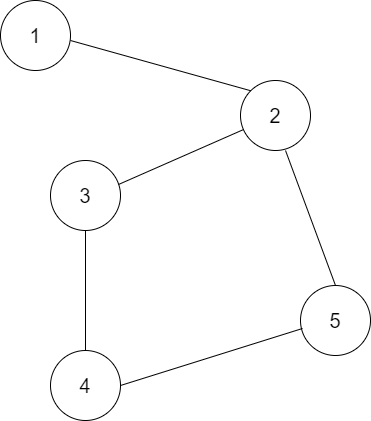

**WEIGHTED GRAPH:**

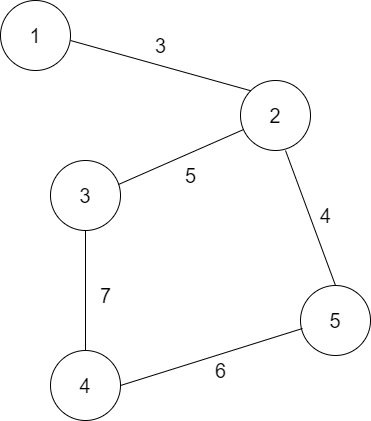

**COMPLETE WEIGHTED GRAPH:**

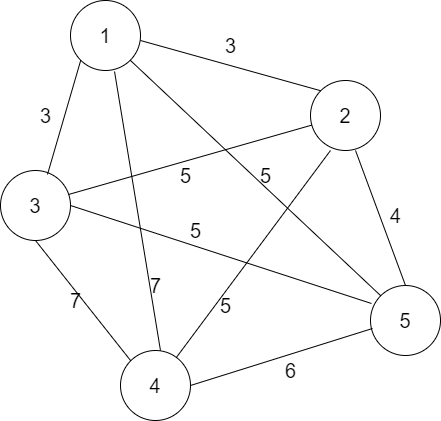



*   **2. Weighted Adjacency Matrix**

A weighted adjacency matrix is a matrix where the $ij$-th entry denotes the weight of the edge between node $i$ and node $j$. A weight of 0 typically denotes the lack of an edge between the two nodes. 

Here is how the weighted adjacency matrix of the example **WEIGHTED GRAPH** provided above would look like:

$ \begin{bmatrix}
0 & 3 & 0 & 0 & 0 \\
3 & 0 & 5 & 0 & 4 \\
0 & 5 & 0 & 7 & 0 \\
0 & 0 & 7 & 0 & 6 \\
0 & 4 & 0 & 6 & 0 
\end{bmatrix}  $


*   **3. Weighted Adjacency Dictionary**

Python datastructure. Takes in as a key the number of the node and returns a list of all its neighbours with the weight of the corresponding edges relating them.



* **4. Path** 

An ordered list of edges which do not repeat that describe a traversal between adjacent vertices. 

Here is an example of a path. It is highlighted in red. 



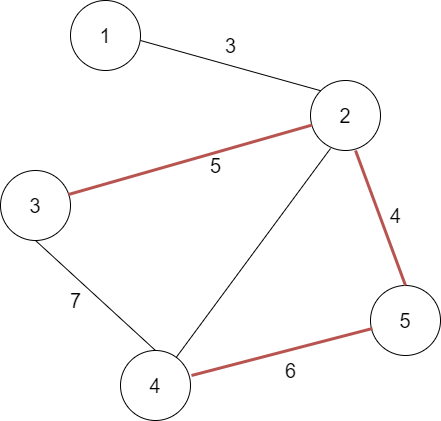

We can express the path as defined (meaning an ordered list of edges): $(e_{45}, e_{52}, e_{23})$ where $e_{ij}$ denotes the connection between vertex $i$ and $j$

But, we can also express it as the ordered list of visited vertices: 
$(v_4, v_5, v_2, v_3)$ where $v_i$ denotes the $i$-th vertex. 

Note that if we reverse the order, the path is equivalent. 

*   **5. Eulerian Circuit**

A path that travels each edge in the graph and comes back to its starting vertex. Based on the definition of a path, it can be said that an Eulerian circuit visits each edge in the graph exactly once.



*   **6. Hamiltonian Circuit**





A path that vists each vertex in the graph exactly once and returns to its starting node. 

*   **7. Cycle**

A cycle is a path that returns to its starting node. 


*   **8. Degree of a vertex**

The amount of edges attached to a node.


*   **9. Isolated node/vertex**

Node that doesn't have any edges attached to it.

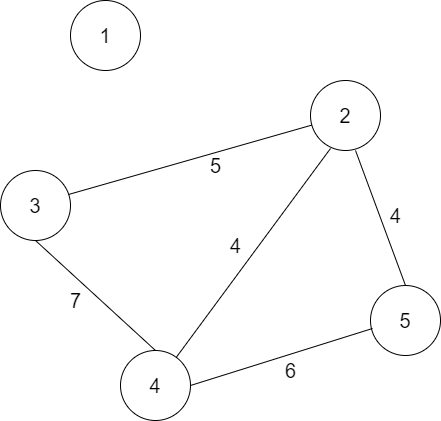

In this example, node/vertex 1 is isolated.

*  **10. Connected Graph**

A graph is called connected if a path exists between each pair of vertices in the graph. It is automatically assumed a given graph is connected unless specified otherwise. 



*   **11. Disconnected Graph**

A disconnected graph is a graph that does not meet the criteria to be called a connected graph. In other words, a path does not exist between each pair of vertices in the graph. Here is an example:

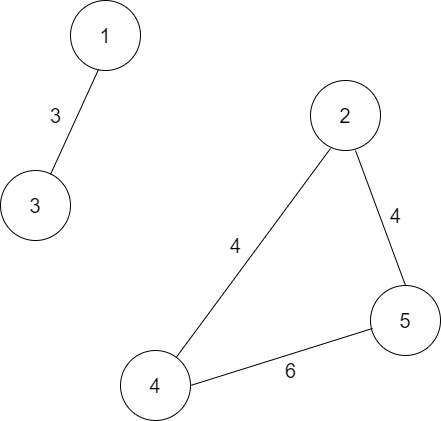

In this graph, a path does not exist between node 1 and 2.

*   **12. Matching**

A matching is a set of edges that are not adjacent, meaning no two edges share the same vertex

*   **13. Perfect Matching**

A perfect matching is a matching that covers all vertices in the graph. Here is an example:

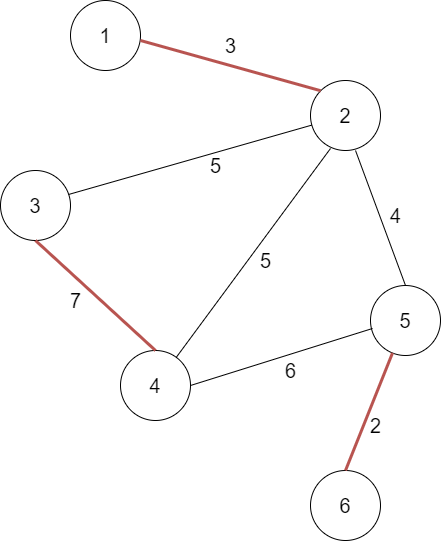

The edges highlighted in red consitute a perfect matching. They are not adjacent, and they attach to each vertex in the graph

*   **14. Cost**

The cost is simply the sum of the weight of all the edges. Cost can be applied to a path (sum the weight of all the edges in the path), to a circuit (sum the weight of all the edges in the circuit), or to a graph (sum the weight of all the edges in the graph) 





*   **15. Triangle Inequality Graphs**



Triangle inequality graphs are graphs where the following inequality applies to any 3 vertices: $C(e_{ab}) + C(e_{bc}) \geq C(e_{ac})$, where $e_{ij}$ denotes the edge between vertex $i$ and $j$, and $C(e)$ denotes the cost of an edge.


*   **16. TSP Graph**




A TSP graph is a complete graph and a triangle inequality graph.

# Brief overview of the model:
Our goal is to computationally prove the efficiency of Christofides' algorithm. To do this, we will compare the runtimes and solution costs for each algorithm, **six** main phases are needed. 

---

**PHASE 1**

The first phase is to create a Graph class. This class will allow us to perform functions on the graph that will prove useful for solving the TSP. Note that we will need later on another Graph class. We will explain why later. Further information for the model of the Graph class can be found in the PHASE 1 section.


---

**PHASE 2**

The second phase is to create a function that generates random complete graphs. This function will input the number of nodes we wish to have in our graph, and it will output an adjacency matrix. The plan is to have a random graph as an input to our three TSP algorithms in order to compare their runtime and cost as the number of nodes increases. Further information for the model of the random graph function can be found  the PHASE 2 section.


---

**PHASE 3**

The third phase is to code Christofides' algorithm. Here are the general steps of Christofides' algorithm: 

1.   Create a minimum-cost spanning tree (MSP)
2.   Create subgraph O of odd-degree vertices from MSP 
3.   Find minimum-weight perfect matching PM of O
4.   Add PM to MSP
5.   Compute an Eulerian circuit E
6.   Compute Hamiltonian circuit H from E

Further information for the model of Christofides' algorithm can be found in the PHASE 3 section.


---

**PHASE 4**

The fourth phase is to code the brute force algorithm. For this section, we imported a code from [1] that calculates the shortest path and the cost of that shortest path. This is done by calculating the cost for all possible paths that can be taken from one starting node. It then outputs the path with the smallest cost and its cost. Indeed, there may sometimes be paths with the same cost and each path can be taken from the opposite direction, while still carrying the same weight. It should also be noted that, like all other algorithms that intend on solving the TSP, there cannot be cycles. Further information for the model of the brute force algorithm can be found in the PHASE 4 section.


---

**PHASE 5**

The fifth phase is to code the nearest neighbour algorithm. This is done through a greedy process of picking a starting node and travelling through the edge with the lowest weight and making sure we don't travel to a previously visisted vertex. This is repeated until the path returns back to the initial vertex. The nearest neighbour algorithm only calculates one path, unlike the brute force algorithm, which makes it have a very quick runtime. Its path is not most accurate (it theoretically should predict a path that is within a factor of 4 of the correct solution)$^{[2]}$. Further information for the model of the nearest neigbour algorithm can be found in the PHASE 5 section.


---

**PHASE 6**

The sixth phase is to create 2 XY graphs that plot the runtime of each of the three algorithms (Y) as a function of a random TSP graph of X nodes. This will help us compare the runtimes for the three algorithms (Christofides, nearest neighbour and brute force). The graphs will be made using Plotly. However, to do this, there are a couple of steps that have to be taken:

First, we will use the random_graph() function from Phase 2 to generate a TSP graph for a set amount of nodes. This graph will be inputted in Christofides, nearest neighbour and brute force, and the runtime will be tracked for each yielding our Y value data for each plot. 

Second, It should be noted that we will create 2 runtime graphs ((A) and (B)), since one (A) would contain the 3 algorithms (Christofides, brute force and nearest neighbour) and the other one (B) would contain only Christofides and nearest neighbour. This was done since the brute force runtime would run for a very long time when going above 11 nodes. Therefore, graph (A) only computes graphs with a number of nodes from 3 to 11, while graph (B) computes graphs with a number of nodes from 3 to 200. Indeed, Christofides and nearest neighbour have a much lower runtime than brute force for more nodes, which allow them to input a higher number of nodes.

Further information for the model of the runtime VS nodes graphs can be found in the PHASE 6 section.


---

**PHASE 7**

The seventh phase is to create 2 XY graphs that plot the cost of the outputted hamiltonian path as a function of a random TSP graph of X nodes. This will help us compare the accuracy of the approximation of Christofides' and nearest neighbour, and see how close they are to the optimal solution (brute force). The graphs will be made using Plotly. Similarly to phase 6, the graphs will be generated using the random_graph() function, and we will seperate this task into two graphs.  

Further information for the model of the cost VS nodes graphs can be found in the PHASE 7 section.



# Algorithms and Results:

In this section, we will be coding and analyzing each function used to define Christofides' algorithm, the brute force algorithm and the nearest neighbour algorithm. 

LIBRARIES WE NEED AHEAD OF TIME

In [ ]:
import numpy as np
import random
import copy 
import math as m
import networkx as nx 
from networkx.algorithms.matching import max_weight_matching
import matplotlib.pyplot as plt
from time import perf_counter
import pandas as pd
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

random.seed(2333) #makes sure we don't have a different output each time

## Phase 1: Creating Graph Class (for Christofides)
The Graph class will be used to perform a variety of functions on our graph. The Graph is initialized with an adjacency matrix. This class and its functions will be mainly used for Christofides' algorithm. It is also possible, in rare cases, that there exists a graph with multiple edges for two nodes; therefore, the entries of the adjacency matrix will be lists so we can have multiple edges of different weight. Such a graph will only exist during our manipulations with the inputted graph. A TSP graph contains only one edge between any two nodes.

### Functions of the Graph class:

1. `add_edge(i, j, value)`

This function will take as an input two vertices $i$ and $j$ and add an edge of weigth $value$ between them. This will be done by adding $value$ the $ij$-th and $ji$-th entry of the adjacency matrix.

2. `remove_edge(i, j, value)`

This function will take as an input two vertices $i$ and $j$ and remove the edge of weigth $value$ between them.

3. `set_zero()`

This function will set all the entries of the adjacency matrix to empty lists. This translates to simply removing all edges in the graph

4. `edge_sort()`

This function will return a list of format `[weight,i,j]` that is sorted based on the value of $weight$. This translates to returning a list of the edges sorted by their weight.

5. `detect_cycle(node)`

This function will take as an input a node and determine whether the node is in a graph with a cycle. The reason we input a specific node is to make sure that we don't chose an isolated node if we were to chose a random node. This will be done using a DFS (depth-first-search) to see if a node is visited more than once. More information on DFS and on this function can be found in Appendix 1. 

6. `get_degree(node)`

This function will take as an input a node and return the degree of that node by looping over the $node$-th entry of the adjacency matrix and summing the length of the list of its entries. This translates to simply counting how many edges the node has. 

7. `get_neighbours(node)`

This function will take as an input a node and return a list of its neighbours. This is done by looping over the `node`-th and checking whether the list contains elements. We then append the nodes for which the list isn't empty and return them. 

8. `get_neighbour_edges(node)`

This function will take as an input a node and return a list of all the edges connecting the neighbours of a node. This is by a similar process to the get_neighbours() function, but instead of simply checking whether the list contains elements, we loop over the list of the entry and create a list of format `[node, neighbour, weight]`, which perfectly describes which vertices the edge connects to and its weight. This list is then appended to another list, which is then returned by the function. This simply translates to returning a list of all the edges connecting neighbours.  

9. `check_connected(visited = [], node):`

This function will take as an input an empty list (we need to manually input the empty list, otherwise the memory address is reused when rerunning the function) and the node from which to start (just to make sure we aren't starting on an isolated node). This algorithm will simply perform a depth-first-search (DFS) and count each vertex it travels over. Then, it will compare the count to the total amount of nodes in the graph (we will disregard isolated vertices). The function will output -1 if the graph is connected, and -2 if the graph isn't connected. The reason we don't use boolean values is due to the recursion parameters, and for code simplicity (avoid having an extra function parameter). More information on DFS and on this function can be found in Appendix 2. 

10. `add_graph(g)`

This function will take as an input a graph $g$, and appends the entries of its adjacency matrix to the graph the function is called on (`self`). This translates to simply adding the edges of $g$ to `self.vertices`.

11. `get_2d_vertices_list()`

This function will convert the graph's adjacency matrix entries from lists to numerical values. If the list is empty, then the value will simply be 0. Of course, we assume the graph has length 1 lists for each entry of the matrix.

12. `count_isolated()`

This function will count the amount of isolated nodes. This will be done by looping over the all the rows of the adjacency matrix and counting how many have all their entries as empty lists. This translates to counting how many nodes have no neighbours (no edges attached to them).

13. `print()`

This function simply prints the matrix in a nice-to-read way. Simply for testing purposes.


In [ ]:
# THIS CODE IS MADE BY HRISTO, NOWHERE ELSE CAN THIS BE FOUND 
# Class to represent a graph
# NOTE: GRAPH MUST ALWAYS BE CONNECTED
class Graph:
 
    def __init__(self, vertices):
      #format for G: adjacency matrix
      #Example: vertices = [[[], [5], [6]],
      #                     [[5], [], [10]],
      #                     [[6], [10], []]]
      self.vertices = vertices
      self.isolated_count = self.count_isolated() 

    #this function will an edge between two vertices i and j of weight value
    def add_edge(self, i, j, value, iso_count = True):
      self.vertices[i][j].append(value)
      self.vertices[j][i].append(value)
      if iso_count:
        self.isolated_count = self.count_isolated()

    #this function will remove an edge between two vertices i and j of weight value
    #we input the weight, because multiple edges of different weight can exist between two nodes
    def remove_edge(self, i, j, value, iso_count = True):
      self.vertices[i][j].remove(value)
      self.vertices[j][i].remove(value)
      if iso_count:
        self.isolated_count = self.count_isolated()

    #function to remove all edges from a graph
    def set_zero(self):
      for i in range(0, len(self.vertices[0])):
        for j in range(0, len(self.vertices)):
          self.vertices[i][j] = []
          self.vertices[j][i] = []

      
    #this function will sort all the edges in ascending order of their weight
    def edge_sort(self):
      list_edge = []
      for i in range(0, len(self.vertices[0])):
        for j in range(i, len(self.vertices)):
          for k in range(0, len(self.vertices[i][j])):
            list_edge.append([self.vertices[i][j][k], i, j])
      list_edge = sorted(list_edge, key=lambda x: x[0]) #built-in python sorting function
      return list_edge

    #Detect cycle in a graph. Basically, conduct DFS starting from some random vertex. If node already visited, then cycle exists.
    def detect_cycle(self, node, visited = [], parent = -1):
      if parent == -1: #initialize recursive function
        visited_n = [False]*len(self.vertices)
        return self.detect_cycle(node, visited_n, node)
      
      #stopping condition
      if visited[node]: 
        return True
      
      visited[node] = True
      
      for i in range(len(self.vertices[node])):
        if i != parent and bool(self.vertices[i][node]):
          if self.detect_cycle(i, visited, node):
            return True

      return False

    #gets the degree of a node/vertex (amount of incident edges)
    def get_degree(self,node):
      count = 0
      for x in range(len(self.vertices[node])):
        if bool(self.vertices[node][x]):
          count += len(self.vertices[node][x])
      return count

    #outputs a list of the neighbours of the node
    def get_neighbours(self, node):
      neighbours = []
      for x in range(len(self.vertices[node])):
        if bool(self.vertices[node][x]):
          neighbours.append(x)
      return neighbours
    
    #outputs a list of adjacent edges of the node. The output is a list, where the 
    #first entry is the node i, the second entry is the node j, and the third entry 
    #is the value of the edge 
    def get_neighbour_edges(self, node):
      neighbour_edges = []
      for x in range(len(self.vertices[node])):
        for k in range(len(self.vertices[node][x])):
          neighbour_edges.append([node, x, self.vertices[node][x][k]])
      return neighbour_edges
    

    #checks if all the vertices in the graph are connected. 
    #IMPORTANT: IF A VERTEX IS ISOLATED (no edges connected to it), then
    #the vertex will not be considered. In other words, isolated vertices 
    #will NOT trigger the function to recognize the graph as disconnected

    #-1: means graph is connected
    #-2: means graph isn't connected
    def check_connected(self, visited = [], node = 0):
      
      #initialize recursive function
      if not visited:
        count_final = self.check_connected([False]*len(self.vertices),node)
        if count_final == len(self.vertices) - self.count_isolated():
          return -1 #connected
        return -2 #not connected
      
      #stopping condition
      if visited[node]:
        return 0
      visited[node] = True
      count_local = 1

      #count unvisited neighbours of current node
      for x in self.get_neighbours(node):
        count_local += self.check_connected(visited, x)
      return count_local

    #will take in another homologuous graph (same size) and add its edges to the current one 
    def add_graph(self, g):
      for i in range(len(self.vertices)):
        for j in range(i, len(self.vertices[0])):
          if bool(g.vertices[i][j]):
            self.vertices[i][j].extend(g.vertices[i][j])
            self.vertices[j][i].extend(g.vertices[i][j])

    #ONLY WORKS IF TWO NODES SHARE NO MORE THAN 1 EDGE
    #will take as an input a graph and output a 2D list representing an adjacency matrix  
    def get_2d_vertices_list(self):
      v_2d = []
      for x in self.vertices:
        row = []
        for y in x:
          if bool(y):
            row.append(y[0])
          else:
            row.append(0)
        v_2d.append(row)
      return v_2d
    
        
    #counts the amount of isolated vertices
    def count_isolated(self):
      count = 0
      for x in self.vertices:
        iso = True
        for y in x:
          if bool(y):
            iso = False
            break
        if iso:
          count += 1
      return count


    #function to print the graph. Easier to read
    def print(self):
      print('____________________________')
      for x in self.vertices:
        print(x)
      print('____________________________')

## Phase 2: Random TSP Graph

The function `random_graph(num_nodes)` takes as an input the number of nodes and returns the adjacency matrix of a TSP graph. It should be noted that we cannot simply add random weights to edges, since we need the triangle inequality to apply to our graph. Therefore, we use a geometric graph (nodes with positions on an XY plane) to get the weight of the edges (distance between the nodes on the XY plane). This will ensure the triangle inequality is respected, because geometrically, it is guaranteed that it will be respected. More information on this in Appendix 3.

We use the networkx module to get a geometric graph. Then, we loop over the nodes and assign the distance between each node as the weight of the edge in our adjacency matrix. We use the pythagorean theorem to find the distance between two nodes $a$ and $b$: $distance = \sqrt{(x_a-x_b)^2+(y_a-y_b)^2}$ where $x_i$ and $y_i$ are the $x$ and $y$ coordinates of the $i$-th node respectively. See Appendix 4 for detailed documentation of coding for Phase 2.

In [ ]:
#Defining function to create random graph, returns the adjacency matrix
def random_graph(num_nodes):
  #Vertices is the adjacency matrix
  vertices = []
  #Row AM is each row in the adjacency matrix
  row_am = []
  #Creating a random graph with a certain amount of vertices (num_nodes)
  #Radius represents the maximum distance between two nodes that are connected with an edge
  graph = nx.random_geometric_graph(num_nodes,radius = 2**30)  
  #Defines position as being the position for each node
  position = nx.get_node_attributes(graph,'pos')
  for v1 in range(0,num_nodes):
    row_am = []
    for v2 in range(0,num_nodes):
      weight = m.sqrt((position[v1][0] - position[v2][0])**2 + (position[v1][1] - position[v2][1])**2) #pythagorean theorem to find distance between two nodes.
      row_am.append(weight)
    
    #Appending each row of the adjacency matrix to the adjacency matrix.    
    vertices.append(row_am)

  return vertices

## Phase 3: Christofides' Algorithm

Christofides' algorithm will be coded by us. We will seperate this task into multiple steps:
1.   Create a minimum-cost spanning tree MSP
2.   Create subgraph O of odd-degree vertices from MSP 
3.   Find minimum-weight perfect matching PM of O
4.   Add PM to MSP
5.   Compute an Eulerian circuit E
6.   Compute Hamiltonian circuit H from E

###Step 1: Create minimum spanning tree of graph

**Now**, we use Kruskal's algorithm for this. Here is a flow chart we made. Note that $G'$ is the graph initialized from $G$ but without any edges:


**FLOWCHART FOR KRUSKAL'S ALGORITHM**



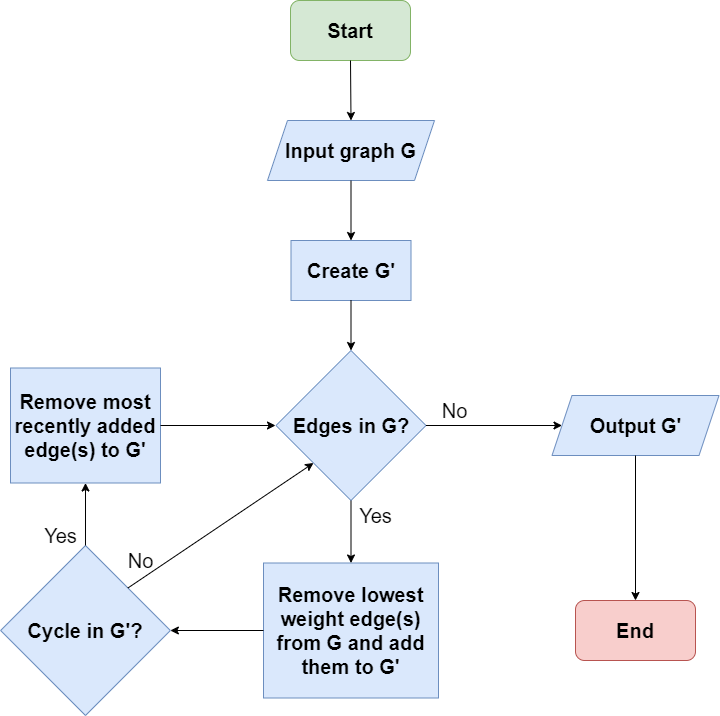

Here is an example of how Kruskal's algorithm can be applied to a weighted graph to find the minimum spanning tree. The vertices in green denote the graph $G$ and the vertices in red denote the graph $G'$.

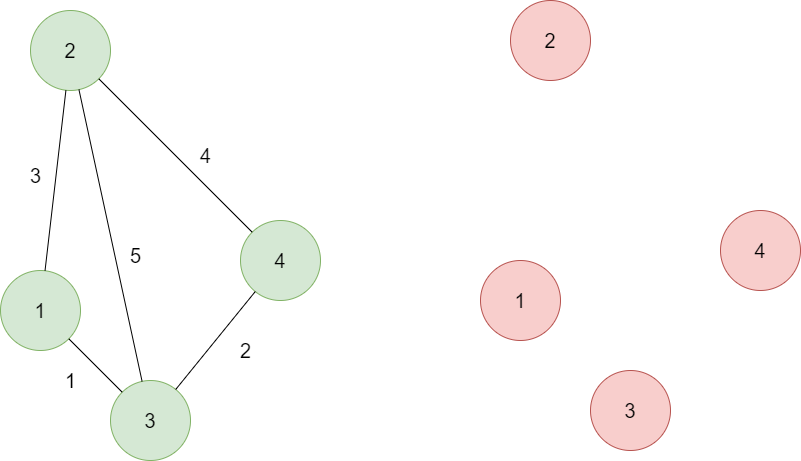

We start by adding removing the lowest weight edge from $G$ and adding to $G'$

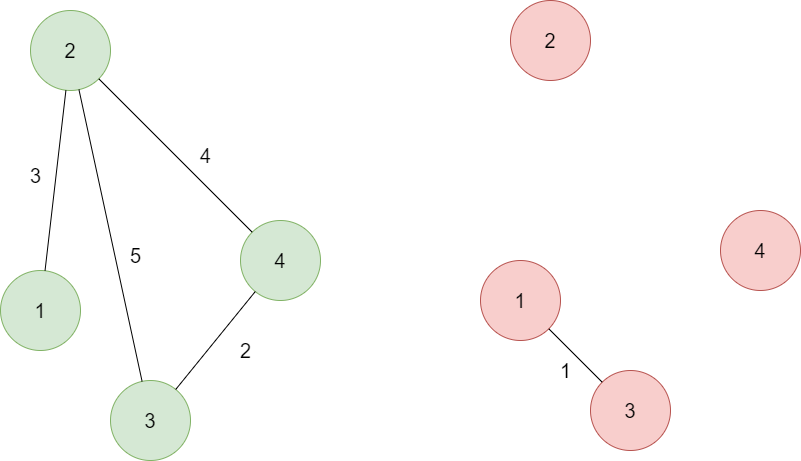

We check if a cycle is created in $G'$. Since there is no cycle, we repeat the process. Let's skip over 2 iterations of the process since they are repetitive. Eventually, we end up at this point: 

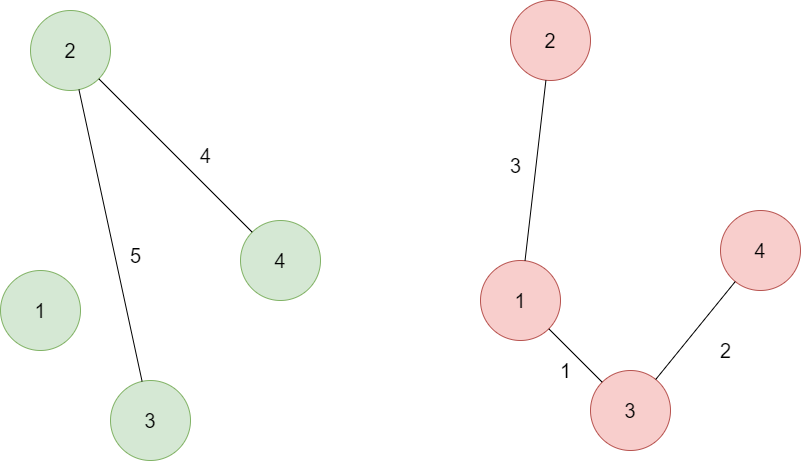

Adding $e_{24}$, we see that a cycle is created (highlighted in red).

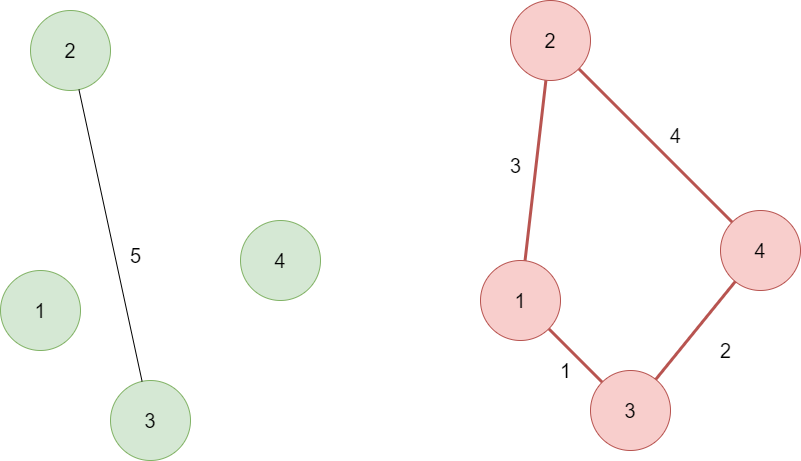

Therefore, we deleted the previously added edge to $G'$ ($e_{24}$)

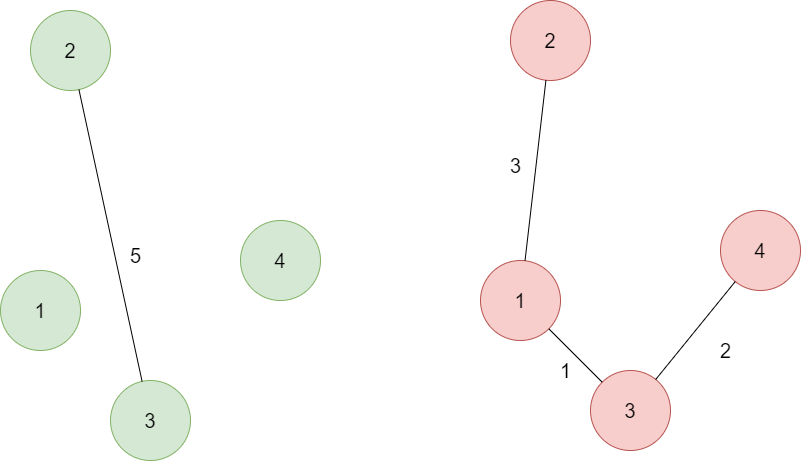

We can see that adding edge 5 also results in a cycle. 

However, to optimize our algorithm and make it run faster, we will terminate the process once $n-1$ edges have been added to $G'$, where $n$ denotes the amount of nodes. This is because any tree has exactly $n-1$ edges (see Appendix 5).


In Appendix 6, you can find a proof of correctness of Kruskal's algorithm.

In [ ]:
#THIS CODE IS MADE BY HRISTO, NOWHERE ELSE CAN THIS BE FOUND 
#this is the minimum spanning tree algorithm
def Get_Minimum_Spanning_Tree(g): #graph is a 2D numpy array. It is an adjacency matrix (illustrated later)
  sorted_edges = g.edge_sort() #sort edges in ascending weight
  msp = copy.deepcopy(g)
  msp.set_zero() #get graph without edges
  count = 0 #count amount of edges added to msp
  for edge in sorted_edges:
    if count == len(g.vertices)-1: #a tree always contain nodes - 1 edges (intuitive: think of a root node, then each new node attached by edge to parent)
      break
    msp.add_edge(i = edge[1], j = edge[2], value=edge[0], iso_count = False) #add edge to MSP 
    count += 1
    store_val = edge[0]
    if msp.detect_cycle(edge[1]): #if a cycle is detect, remove recently added edge
      msp.remove_edge(i = edge[1], j = edge[2], value = store_val, iso_count = False) #remove edge if cycle is detected
      count -= 1
  return msp

###Step 2: Minimum-cost perfect matching of odd degree vertices graph from minimum spanning tree

First, we need to get the complete graph of odd degree vertices from the minimum spanning tree. This will be done by simply adding all the edges that connect odd degree vertices. The code is trivial. A copy of the inputted graph initialized with no edges will be populated with the corresponding edges. 

In [ ]:
#THIS CODE IS MADE BY HRISTO, NOWHERE ELSE CAN THIS BE FOUND 
#this function will output the subgraph that contains only odd degree vertices
#g is the complete graph we are working with
#msp is the graph we want to extract the odd vertices from
def Get_Odd_Vertices_Graph(g, msp):
  odd = []
  g_odd = copy.deepcopy(g)
  g_odd.set_zero()
  for i in range(len(msp.vertices)):
    if msp.get_degree(i) % 2 == 1:
      odd.append(i)

  for x in range(len(odd)):
    for y in range(x+1, len(odd)):
      g_odd.add_edge(i = odd[x], j = odd[y], value = g.vertices[odd[x]][odd[y]][0], iso_count = False)
  return g_odd

  

Second, we run the maximum weight perfect matching algorithm from the networkx library. In our case, we are looking for the minimum cost perfect matching, but that can be solved easily if we multiply all of our values by -1. This algorithm is extremely complicated, and an entire project in itself can be dedicated to it. Hence, we will use the networkx module for this, since they provide the max_weight_matching() function found in networkx.algorithms.matching. Here is the documentation: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.matching.max_weight_matching.html

Note that this is the algorithm responsible for the $O(n^3)$ time complexity of Christofides' algorithm since it the highest (reminder that an algorithm's time complexity is equal to the time complexity of the subalgorithm with the highest one).   

One might realize that for a perfect matching to exist we must have an even amount of vertices. Luckily for us, there is always an even amount of odd degree vertices in a graph (see Appendix 7). 

In [ ]:
#this function will input a graph and return the minimum-cost perfect matching
def Get_Minimum_Cost_Perfect_Matching(g):
  g_match = copy.deepcopy(g)
  g_match.set_zero() 
  vertices = g.get_2d_vertices_list() 
  matching = nx.max_weight_matching(nx.from_numpy_array(-1*np.array(vertices)), maxcardinality=True) #networkx library for maximum weight matching
  for x in matching:
    g_match.add_edge(i = x[0], j = x[1], value = g.vertices[x[0]][x[1]][0], iso_count = False)
  return g_match


###Step 3: Add minimum-cost perfect matching to minimum spanning tree 
Notice that, at this step, all vertices are gonna be of even degree. This is obvious; we took all the odd degree vertices in the minimum-spanning tree, and we add an edge to them (perfect-matching). Thus, the parity of the degree of the vertex will change from odd to even. The even vertices remain the same degree, since the perfect-matching was only applied to odd degree vertices. 

###Step 4: Generate a random Eulerian circuit 

We can prove that every even graph (a graph that contains only even degree vertices) has an Eulerian circuit (see Appendix 8). 

We will thus create an algorithm that will pick a random starting node and traverse the graph. At each edge traversal, we remove the edge and we verify if the graph is being disconnected, since we want to make sure we are able to travel to all vertices. If it is, we add the edge back and we pick another edge unless it is the only possibility. If not, we proceed. We add in order all the vertices we visit to a list we will call trail, and we output this list when they are no edges left in the graph. Here is a flowchart we made that describes the logic more accurately. Note that $G'$ is simply a copy of $graph$:


**FLOWCHART FOR EULERIAN CIRCUIT ALGORITHM:**

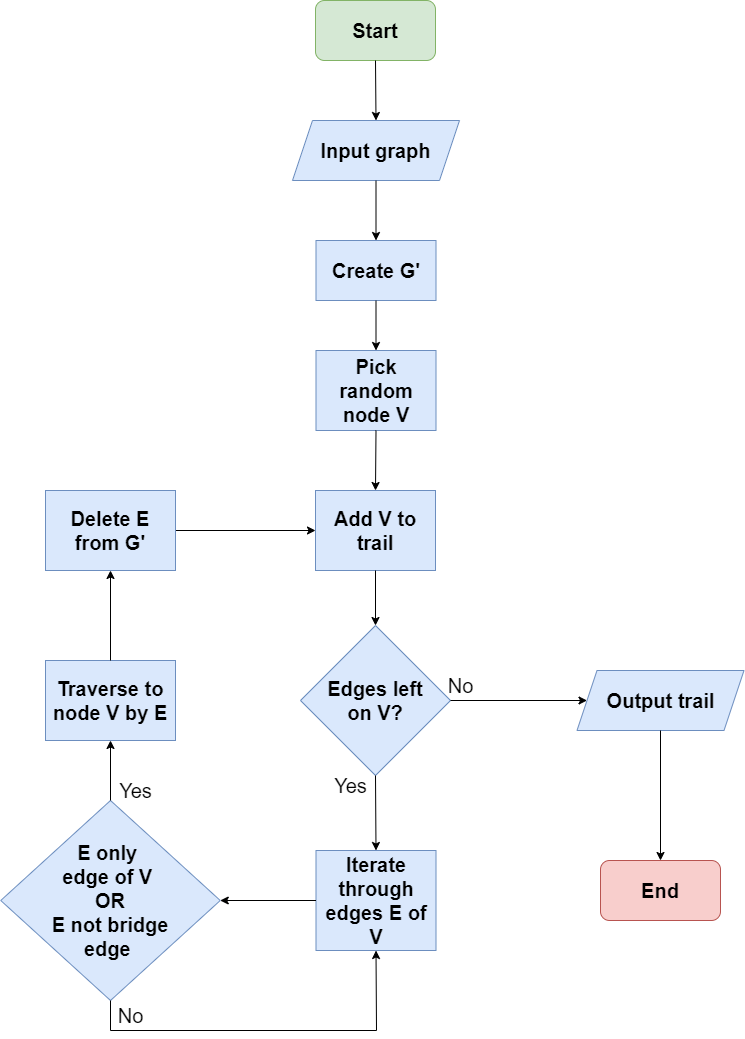

In [ ]:
#THIS CODE IS MADE BY HRISTO, NOWHERE ELSE CAN THIS BE FOUND 
#helper function for Get_Euler_Function(). This will determine whether the edge is a bridge edge (meaning if the edge is crucial to connecting two components)
def edge_works(g, i, j, val):
  iso_count = g.isolated_count
  g.remove_edge(i,j,val)
  if g.isolated_count > iso_count: #did the amount of isolated nodes increase? (done because Graph.check_connected() function doesn't detect isolated vertices)
    g.add_edge(i,j,val)
    return False
  if g.check_connected([],i) == -1: #check if the deleted edge disconnected the graph
    g.add_edge(i,j,val)
    return True
  g.add_edge(i,j,val)
  return False



#outputs a random euler circuit (a path that visits every edge once)
#ONLY WORKS ON EVEN GRAPHS (only even degree vertices)
def Get_Euler_Circuit(g, node, trail):
  if node == -1: #initialize recursive function
    g_copy = copy.deepcopy(g)
    node = random.randint(0, len(g.vertices)-1)
    trail.append(node)
    return Get_Euler_Circuit(g_copy, node, trail)

  edges_poss = g.get_neighbour_edges(node)

  #stopping condition
  if not bool(edges_poss): #empty list: no more possible edges, so return trail
    return trail
  #only one edge possible for visit
  elif len(edges_poss) == 1:
    g.remove_edge(i = node, j = edges_poss[0][1], value = edges_poss[0][2])
    trail.append(edges_poss[0][1])
    return Get_Euler_Circuit(g, edges_poss[0][1], trail)
  else: #multiple possible edges can be visited
    random.shuffle(edges_poss)
    for x in edges_poss:
      if edge_works(g, node, x[1], x[2]): #check if edge disconnects graph or creates isolated vertex
        g.remove_edge(i = node, j = x[1], value = x[2])
        trail.append(x[1])
        return Get_Euler_Circuit(g, x[1], trail)

  

  
  


###Step 5: Generate Hamiltonian circuit

In this step, we simply remove previously visited vertices in the order of traversal indicated by our Eulerian circuit. By removing all repeated vertices, we are making sure to visit each vertex only once. Remember that our TSP graph is COMPLETE; therefore, an edge is possible between each node, so any ordering of vertices is possible for our traversal. 

Here is an example:

Let E be the Eulerian circuit $[7, 8, 0, 3, 5, 2, 9, 6, 1, 0, 4, 7]$.

Notice that the 10th entry of the Eulerian circuit is 0. We have already previously visited vertex 0 (entry 3). We delete the 10th entry yielding the following Hamiltonian circuit: 
$[7, 8, 0, 3, 5, 2, 9, 6, 1, 4, 7]$

In [ ]:
#THIS CODE IS MADE BY HRISTO, NOWHERE ELSE CAN THIS BE FOUND 
#function that will take an eulerian circuit and remove repeating vertices travelled in that circuit to produce a hamiltonian circuit
def Get_Hamiltonian_From_Eulerian(e):
  h = []
  present = [False]*(len(e)-1)
  for x in e[:-1]:
    if not present[x]:
      h.append(x)
      present[x] = True
  h.append(e[-1])
  return h


We will also need a function to calculate the cost of the Hamiltonian circuit

In [ ]:
#this function will take as an input a graph and the hamiltonian circuit and output the cost of the circuit
def Get_Cost_Of_Hamiltonian(g,h):
  cost = 0
  for x in range(1, len(h)):
    cost += g.vertices[h[x-1]][h[x]][0]
  return cost


By adding all these steps together, we have implemented Christofides' algorithm to approximate a solution to the Travelling Salesman Problem. 

In [ ]:
#THIS CODE IS MADE BY HRISTO (except perfect matching), NOWHERE ELSE CAN THIS BE FOUND 
#this function will take as an input a graph, and output an approximate minimum-cost hamiltonian circuit  
def Christofides_Algorithm(g):
  msp = Get_Minimum_Spanning_Tree(g) #STEP 1 Get minimum spanning tree
  odd_v = Get_Odd_Vertices_Graph(g, msp) #STEP 2.1  Get odd vertices graph
  minimum_cost_perfect_matching = Get_Minimum_Cost_Perfect_Matching(odd_v) #STEP 2.2 Get minimum-cost perfect matching
  msp.add_graph(minimum_cost_perfect_matching) #STEP 3 Add minimum-cost perfect matching to minimum spanning tree
  euler_circuit = Get_Euler_Circuit(msp, -1, []) #STEP 4 Get euler circuit
  approx = Get_Hamiltonian_From_Eulerian(euler_circuit) #STEP 5 Get hamiltonian circuit (approximation)
  cost = Get_Cost_Of_Hamiltonian(g,approx) #get the cost of the hamiltonian circuit
  return cost, approx


Below is a function that will simply take in a 2D adjacency matrix and convert it to a `Graph` object. We will need this later on for formatting purposes. 

In [ ]:
#THIS CODE IS MADE BY HRISTO, NOWHERE ELSE CAN THIS BE FOUND 
#this function will input a 2d adjacency matrix and convert it to Graph (as defined above)
def convert_to_graph_3d(vertices):
  vert_3d = []
  for x in vertices:
    row = []
    for y in x:
      if y != 0:
        row.append([y])
      else:
        row.append([])
    vert_3d.append(row)
  return Graph(vert_3d)

##Phase 3.5: Creating second class Graph2
This class is nearly identical to the Graph class, but is recreated to have the adjacency matrix used as a 2D list instead of a 3D list. This is done simply because we worked concurrently on certain parts of the project; the first class Graph is incompatible with the brute force algorithm and the nearest neighbour algorithm. Notice that it only uses the `__init__()` function since that is all that was used and needed for those parts of the code.

In [ ]:
from collections import defaultdict
class Graph2:
 
    def __init__(self, vertices):
      #format for G: adjacency matrix
      #Example: vertices = [[0, 5, 6],
      #                    [5, 0, 10],
      #                    [6, 8, 0]]
      self.vertices = vertices



```
# This is formatted as code
```

## Phase 4: Brute Force Algorithm

### Step 1: Transform adjacencty matrix into dictionary

The code written for the brute force algorithm uses a dictionary for the adjacency matrix (written in STEP 2), so we must transform our adjacency matrix from a 2D list to a dictionary to get a weighted adjacency dictionary. This can be seen below. See Appendix 9 for detailed documentation of coding for Phase 4.

In [ ]:
#Needed for Brute Force Algorithm
#Turning adjacency matrix from 2D list into Dictionary
def dict_vertices(num_nodes,g):
  list_2D = g.vertices
  dict_vertices = {} 
  for node in range(0,num_nodes):
    dict_vertices.setdefault(node, {})

  for node in range(0,num_nodes):
    row = list_2D[node]
    for i in range(0,num_nodes):
      dict_vertices[node].setdefault(i, row[i])
  return dict_vertices


### Step 2: brute force algorithm code 

In the block of the code below, we used an external source from https://gist.github.com/westphahl/432876. $^{[1]}$

The brute force algorithm will take as input the weighted adjacency dictionary. Essentially, the brute force algorithm works by going over all permutations of vertices to form a hamiltonian circuit and, for each hamiltonian circuit, it assigns its cost. It stores everything in a list (routes), and it sorts in ascending order the cost of each circuit and returns the first element (circuit with the lowest cost) of the routes list. 

In [ ]:
# https://gist.github.com/westphahl/432876
# Brute Force Algorithm
# CHANGE MADE TO THIS CODE BY NOAH: has_key() method does not exist in Python 3, so we replaced by in operator.
# Example: cities[path[-1]].has_key(path[0]), we changed it to: (path[0]) in cities[path[-1]]

def find_paths(node, cities, path, distance, routes):
    # Add way point
    path.append(node)

    # Calculate path length from current to last node
    if len(path) > 1:
        distance += cities[path[-2]][node]

    # If path contains all cities and is not a dead end,
    # add path from last to first city and return.
    if (len(cities) == len(path)) and ((path[0])in cities[path[-1]]):
        path.append(path[0])
        distance += cities[path[-2]][path[0]]
        #print(path, distance)
        routes.append([distance, path])
        return

    # Fork paths for all possible cities not yet used
    for city in cities:
        if (city not in path) and (node in cities[city]):
            find_paths(city, dict(cities), list(path), distance, routes)
    
#This code was made by Noah
def brute_force(vertices):
  routes = []
  find_paths(0, vertices, [], 0, routes)
  routes.sort()
  if len(routes) != 0:
    return routes[0]   
  else:
    return ['Fail']

#num_nodes = 5
#g2 = Graph2(random_graph(num_nodes))
#adj_matrix_dict = dict_vertices(num_nodes,g2)
#print(find_paths(0,adj_matrix_dict,[],0))


## Phase 5: Nearest Neighbour Algorithm

In the block below, we set up the nearest neighbour algorithm. 

### **Explanation of the logic behind the algorithm** 

The nearest neighbour algorithm is a greedy algorithm that works by choosing the edge with the lowest weight to travel to at each iteration of the process. It then will form a hamiltonian circuit. By choosing the edge with the lowest weight when travelling from node to node, the algorithm hopes to minimize the cost of the hamiltonian circuit.

### **General steps**

1.   Pick a random starting node and add it to the path $P$
2.   Pick the nearest edge (edge with the lowest weight) that leads to an unvisited vertex
3.   Add the new vertex to $P$
4.   Repeat 2. and 3. until all vertices have been visited
5.   Add the starting node (first element of $P$) to the path again and output $P$ (the resulting Hamiltonian circuit) 

### **Coding focused steps:** 

#### STEP 1: Picking a random starting node

We set the starting node to 0. We add it to our path $P$. The starting node can be ANY node since a hamiltonian circuit visits all nodes in the graph. We decided to chose 0. We initialize our list of `possible_nodes` to visit. The list will contain all vertex indices from 1 to $n$. We do not include 0, since we start at 0.

#### STEP 2: Picking the nearest edge

We loop over the `possible_nodes` list and check which node $V$ is connected with the edge with the lowest weight and with the current node we are at.

#### STEP 3: Adding the new vertex to the path

We add $V$ to $P$, and we remove $V$ from `possible_nodes`

#### STEP 4: Recursive process

We continue the recursive process (see Appendix 10) to $V$, step 2 and 3, by setting the `node` parameter to its value. The recursion will stop once we have exhausted our list of possible nodes to visit (meaning `len(possible_nodes) == 0`)

In [ ]:
# Coded by Noah
# Define function for Nearest Neighbour Algorithm
def nearest_neighbour(g, node=copy.deepcopy(0), path=copy.deepcopy([]), distance=copy.deepcopy(0), possible_nodes=copy.deepcopy([])):
  
  #initializing the recursion
  if node == 0:
    #Creating a list of possible nodes. This represents the possible nodes we can travel to. 
    #Once a node has been visited, it is removed from this list. Hence, 0 is not there (starting node). 
    possible_nodes = [i for i in range(1,len(g.vertices))] 
    
    #path: represents the node path (list of vertices)
    path = [node]   

  #stopping condition for our function. If the length of the list is 0, 
  #we have exhausted the possible nodes to visit. We return the distance and the path
  #found so far
  if len(possible_nodes) == 0:
    path.append(path[0]) #append the last vertex to complete the circuit
    distance += g.vertices[node][path[0]]
    return [distance, path]

  #Setting shortest distance to be very very large (2^30)
  next_node_distance = 2**30

  #this variable will store the node that should be 
  #visited next. This will be the neighbour with the lowest 
  #cost edge associated with the current node.
  #It is initialized at -1 because no node can be set at -1.
  next_node = -1

  #loop over possible_nodes to visit and find lowest weight edge
  for n in possible_nodes:
    if g.vertices[node][n] < next_node_distance:
      next_node_distance = g.vertices[node][n]
      next_node = n

  #add next_node to path
  path.append(next_node)

  #remove next_node from possible_nodes such that we don't visit it again
  possible_nodes.remove(next_node)

  #add the distance (cost) to travel to next_node to the distance travelled so far
  distance += next_node_distance

  #continue the recursion
  return nearest_neighbour(g, next_node, path, distance, possible_nodes) 


## Phase 6: Runtime Graphs


We will use runtime graphs to analyze how long each algorithm takes to compute a solution based on the size of the TSP graph. We will use them to compare each algorithm to each other.

###Step 1: First Graph (A): From nodes 3 to 11:

We decided to only go over 3 to 11 nodes, since the runtime for the brute force algorithm would be too high if we went up to 12 nodes or more. In other words, the program would take too long to run.

Here, we store the Christofides, the brute force, and the nearest neighbour runtimes for 3 to 11 nodes in 3 seperate lists, called `t_christofides`, `t_bruteforce` and `t_nearestneighbour` correspondingly. For example, `t_christofides` stores the time needed to run the christofides' algorithm. To track the runtime, we use `perf_counter()` which will timestamp the time in seconds. We track the time before and after the algorithm is done running, and then we subtract both values to get the execution time of the algorithm.  

We also store the cost for each algorithm, since we will need it for future graphs. This is to save some time running the code. 

In [ ]:
#coded by Hristo and Noah
from time import perf_counter

t_christofides = []  #Time interval list to run Christofides' algorithm from node 3 to 11 (stored in seconds)
t_bruteforce = []    #Time interval list to run Brute Force algorithm from node 3 to 11 (stored in seconds)
t_nearestneighbour = []   #Time interval list to run Nearest Neighbour algorithm from node 3 to 11 (stored in seconds)
c_christofides = [] #Cost list to run Christofides' algorithm from node 3 to 11
c_bruteforce = [] #Cost list to run bruteforce algorithm from node 3 to 11
c_nearestneigbour = [] #Cost list to run nearest neighbour algorithm from node 3 to 11

nodes_1 = []  #x coordinates for plot: Represents the number of nodes in graph

for num_nodes in range(3,12):  #3 to 11 nodes
  nodes_1.append(num_nodes)   
  adj_matrix = random_graph(num_nodes)
  node = 0 #Starting node
  g1 = convert_to_graph_3d(adj_matrix)
  g2 = Graph2(vertices = adj_matrix) #Should we change random_graph to random_am

  #Used to calculate the time intervals to run Christofides' Algorithm 
  t1_start = perf_counter()    #perf_counter() stores in t1_start the time in seconds, which makes t_christofides in seconds
  c_christofides.append(Christofides_Algorithm(g1)[0])
  t1_end = perf_counter()
  t_christofides.append(t1_end - t1_start)

  #Used to calculate the time intervals to run Brute Force algorithm (find_paths)
  adj_matrix_dict = dict_vertices(num_nodes,g2)
  t2_start = perf_counter()
  c_bruteforce.append(brute_force(adj_matrix_dict)[0])
  t2_end = perf_counter()
  t_bruteforce.append(t2_end - t2_start)

  #Used to calculate the time intervals to run Nearest Neighbour algorithm
  t3_start = perf_counter()
  c_nearestneigbour.append(nearest_neighbour(g2,node)[0])
  t3_end = perf_counter()
  t_nearestneighbour.append(t3_end - t3_start)


We will use Plotly to create our graphs:

In [ ]:
#coded by Hristo and Noah
#set up data so it is ready to be plotted
d = {'Number of nodes': nodes_1, 'Christofides': t_christofides, 'Brute Force': t_bruteforce, 'Nearest Neighbour': t_nearestneighbour}
data = pd.DataFrame(data=d)

#christofides plot
christofides_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides'],
    name = 'Christofides',
    marker=dict(
        color='rgb(255,0,0)'
    )
)

#brute force plot
brute_force_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Brute Force'],
    name = 'Brute Force',
    marker=dict(
        color='rgb(0,0,255)'
    )
)

#nearest neighbour plot
nearest_neighbour_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Nearest Neighbour'],
    name = 'Nearest Neighbour',
    marker=dict(
        color='rgb(0,255,0)'
    )
)

#arrow 1
arrow1 = go.layout.Annotation(dict(
                x= 8.95,
                y= 1,
                xref="x", yref="y",
                text="For 9 nodes, brute force already <br> runs considerably slower than the two others",
                showarrow=True,
                axref = "x", ayref='y',
                ax= 9-1,
                ay= 10,
                arrowhead = 3,
                arrowwidth=3.5,
                arrowcolor='rgb(0,0,0)',)
            )
arrowlist = [arrow1]
#set up plot
data = [nearest_neighbour_plot, christofides_plot, brute_force_plot]
fig = go.Figure(data=data)
fig.update_layout(
    title='Comparing runtime of brute force, Christofides and nearest neighbour algorithm <br>'+       
'                    as a function of the number of nodes in a TSP graph (A)',
    xaxis_title = 'Number of nodes in the TSP graph',
    yaxis_title = 'Runtime (in seconds)',
    annotations = arrowlist
)
fig.show()



Note for each runtime graphs: When you drag your mouse over the plots, you get the $(x,y)$ coordinate of the plot, where the first number represents the $X$ axis (number of nodes in graph) and the second represents the $Y$ axis (runtime in seconds). 

In the runtime graph (A) above, we see the runtime for the Christofides, brute force and nearest neighbour algorithm for TSP graphs of size 3 to 11. It should be noted that Christofides' and nearest neighbour's runtime overlap between 3 and 11 nodes. Brute force also overlaps the runtimes of the other algorithms until around the 9th node (indicated by the arrow), where the runtime suddenly starts to increase visually. At the 11th node, the brute force algorithm has a runtime that passes 40 seconds. Clearly, there is a significant growth in the runtime of the brute force algorithm already up to the 11th node, while both Christofides' and the nearest neighbour algorithm appear to barely change. It should be noted that this change is the reason we stopped our graph at 11 nodes, since the brute force algorithm's runtime would increase too much after that, and the program would take a long time to run. Understanding the brute force algorithm's runtime is important to see its cons compared to the other algorithms. If we compare brute force's time complexity of $O(n!)$ to Christofides' $O(n^3)$ and nearest neighbour's $O(n^2)$, we understand why the runtime evolves much faster; $n!$ is a function that increases way faster than $n^3$ and $n^2$. 

The runtime for the nearest neighbour algorithm and Christofides' algorithm stay low from 3 to 11 nodes. As we can see, the runtime for these algorithms increase at such a small rate here that it appears to not have a slope. However, we will see in the second runtime graph (B) that Christofides' algorithm does in fact have an increasing slope as the amount of nodes increases, and so does the nearest neighbour. The nearest neighbour algorithm is also shown to increase in graph (B).

### Step 2: Second Graph (B): From nodes 3 to 200


In [ ]:
#coded by Hristo and Noah

tt_christofides = []  #Time interval list to run Christofides' algorithm from node 10 to 200
tt_nearestneighbour = []  #Time interval list to run Nearest Neighbour algorithm from node 10 to 200
cc_christofides = [] #Cost list to run Christofides' algorithm from node 10 to 200
cc_nearestneighbour = [] #Cost list to run Nearest Neighbour algorithm from node 3 to 200
nodes_2 = []   #x coordinates for plot: Represents the number of nodes in graph 

for num_nodes in range(3,201): 
  nodes_2.append(num_nodes) 
  adj_matrix = random_graph(num_nodes)
  node = 0 #Starting node
  g1 = convert_to_graph_3d(adj_matrix)
  g2 = Graph2(vertices = adj_matrix) 

  #Used to calculate the time intervals to run Christofides' Algorithm 
  t1_start = perf_counter()
  cc_christofides.append(Christofides_Algorithm(g1)[0])
  t1_end = perf_counter()
  tt_christofides.append(t1_end - t1_start)

  #Used to calculate the time intervals to run Nearest Neighbour algorithm
  t3_start = perf_counter()
  cc_nearestneighbour.append(nearest_neighbour(g2,node)[0])
  t3_end = perf_counter()
  tt_nearestneighbour.append(t3_end - t3_start)



Because of Christofides' variance in runtime as the amount of nodes increase (the runtime appears to be going up and down due to randomness (explained below)), we will add a fitted curve for its runtime to better track its runtime and to better analyze it. We know that the time complexity is $O(n^3)$, so we need to fit the function $ax^3 + b$. We will do this using Scipy's curve fitting function. Documentation can be found in [4].

In [ ]:
#coded by Hristo and Noah

#initialize list to store predicted values
tt_christofides_fit = []

#define function to be fitted
def func(x,a,b):
  return a*x**3 + b

#get optimal parameters a and b for fitted curve. Found in popt.
#popt[0] returns a, popt[1] returns b
popt, pcov = curve_fit(func, nodes_2, tt_christofides)

#create plot data for fitted function
for x in nodes_2:
  tt_christofides_fit.append(func(x,popt[0],popt[1]))



Below is the code for displaying the graph:

In [ ]:
#coded by Hristo and Noah
#set up data so it is ready to be plotted
d = {'Number of nodes': nodes_2, 'Christofides': tt_christofides, 'Nearest Neighbour': tt_nearestneighbour, 'Christofides Fit': tt_christofides_fit}
data = pd.DataFrame(data=d)

#christofides plot
christofides_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides'],
    name = 'Christofides',
    marker=dict(
        color='rgb(255,0,0)'
    )
)

#nearest neighbour plot
nearest_neighbour_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Nearest Neighbour'],
    name = 'Nearest Neighbour',
    marker=dict(
        color='rgb(0,255,0)'
    )
)

#christofides predicted plot
christofides_fit_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides Fit'],
    name = 'Christofides Fit',
    marker = dict(
        color='rgb(255,0,0)'
    ),
    line=dict(dash='dash')
)

#arrow 1
arrow1 = go.layout.Annotation(dict(
                x= 199,
                y= 0.1,
                xref="x", yref="y",
                text="For 200 nodes, nearest <br> neighbour has a runtime <br> under 0.01 seconds",
                showarrow=True,
                axref = "x", ayref='y',
                ax= 190-7,
                ay= 0.1+1.5,
                arrowhead = 3,
                arrowwidth=3.5,
                arrowcolor='rgb(0,0,0)',)
            )

arrowlist = [arrow1]
data = [nearest_neighbour_plot, christofides_plot, christofides_fit_plot]
fig = go.Figure(data=data)
fig.update_layout(
    title='Comparing runtime of Christofides and nearest neighbour algorithm <br>'+       
'                    as a function of the number of nodes in a TSP graph (B)',
    xaxis_title = 'Number of nodes in the TSP graph',
    yaxis_title = 'Runtime (in seconds)',
    annotations=arrowlist
)
fig.show()



In graph (B), we see the runtime for Christofides' algorithm and nearest neighbour algorithm as a function of TSP graphs of size 3 to 200 nodes. Even here, it can still be seen that the nearest neighbour algorithm remains under 0.01 seconds all the way up to 200 nodes (you can confirm for yourself by hovering over the green plot at the end of the graph as guided by the arrow). This goes to show that the the runtime for nearest neighbour algorithm increases very slowly even for a large amount of nodes. This allows us to understand that it is very efficient time wise. If you want to check for yourself that the nearest neighbour algorithm has an increasing runtime, drag your mouse over the nearest neighbour plotline from left to right. You will see the values of the runtime ($Y$ value) increasing as you increase the number of nodes.

There is a lot of variance in the runtime of Christofides, mainly due to Kruskal algorithm and to the minimum cost perfect matching algorithm, which causes randomness. This is why we set up the fitted curve for Christofides' algorithm, to see the general trend for its runtime.

The runtime for Christofides' algorithm also increases at a much slower rate than the brute force algorithm. Indeed, even after 200 nodes in the graph, Christofides' runtime still remains under 10 seconds, while the brute force algorithm, at 11 nodes in graph (A), surpasses 40 seconds. This was expected since we stated that brute force has a shocking time complexity of $O(n!)$, compared to Christofides' with $O(n^3)$.

As seen here from the fitted curve for Christofides, the trend is for the slope of the runtime of Christofides' algorithm to increase as the amount of nodes increases. This also happens to the nearest neighbour algorithm; however, we do not see this trend because of the amount of nodes we are working with, and because the increase in the runtime is in milliseconds. This makes sense as Christofides and nearest neighbour have a time complexity of $O(n^3)$ and $O(n^2)$ respectively; naturally, Christofides' runtime evolves faster than that of nearest neighbour.  


### Discussing graph A and B 

By evaluating these two runtime graphs, it can be seen that it is not efficient to use the brute force algorithm for a large amount of nodes. On the other hand, both Christofides' algorithm and nearest neighbour algorithm are efficient for a large amount of nodes. However, nearest neighbour will remain the most efficient algorithm for a very very large amount of nodes, as the runtime slope increases much slower than Christofides' algorithm and brute force algorithm. Christofides still remains in close second with nearest neighbour since, as described before, its runtime remains under 10 seconds for 200 nodes, while nearest neighbour has a runtime under 0.01 seconds for the same amount of nodes. 

**Uses of the different algorithms**: Since the nearest neighbour algorithm is very time efficient, it should be used when we want to use a very large amount of nodes and produce a solution in a very short amount of time (in milliseconds). Since Christofides' algorithm has a very similar runtime to the nearest neighbour's runtime, it should be used when we want a very large amount of nodes, but it should be noted that its runtime may be slightly longer than the nearest neighbour algorithm's runtime. The brute force algorithm has a runtime nowhere near Christofides' or the nearest neighbour's runtime (brute force's runtime is very high and increases quickly), so if we want to save time, it should only be used when the amount of nodes is less than 11.

## Phase 7: Cost Solution Graphs

Our goal will be to showcase how close to the optimal solution (brute force output) Christofides' approximation is, and how this approximation is more accurate than the nearest neighbour's approximation.

###STEP 1: First Graph: From nodes **3 to 11**


In [ ]:
#coded by Hristo and Noah
#set up data so it is ready to be plotted
d = {'Number of nodes': nodes_1, 'Christofides': c_christofides, 'Brute Force': c_bruteforce, 'Nearest Neighbour': c_nearestneigbour}
data = pd.DataFrame(data=d)

#christofides plot
christofides_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides'],
    name = 'Christofides',
    marker=dict(
        color='rgb(255,0,0)'
    )
)

#brute force plot
brute_force_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Brute Force'],
    name = 'Brute Force',
    marker=dict(
        color='rgb(0,0,255)'
    )
)

#nearest neighbour plot
nearest_neighbour_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Nearest Neighbour'],
    name = 'Nearest Neighbour',
    marker=dict(
        color='rgb(0,255,0)'
    )
)

#arrow 1
arrow1 = go.layout.Annotation(dict(
                x= 3.1,
                y= 2.39,
                xref="x", yref="y",
                text="1. Overlap of the cost of the solutions",
                showarrow=True,
                axref = "x", ayref='y',
                ax= 3.5,
                ay= 3.39,
                arrowhead = 3,
                arrowwidth=3.5,
                arrowcolor='rgb(0,0,0)',)
            )

#arrow 2
arrow2 = go.layout.Annotation(dict(
                x= 6.95,
                y= 2.38,
                xref="x", yref="y",
                text="2. Random match with optimal solution",
                showarrow=True,
                axref = "x", ayref='y',
                ax= 6.6,
                ay= 1.48,
                arrowhead = 3,
                arrowwidth=3.5,
                arrowcolor='rgb(0,0,0)',)
            )

arrowlist = [arrow1, arrow2]
data = [nearest_neighbour_plot, christofides_plot, brute_force_plot]
fig = go.Figure(data=data)
fig.update_layout(
    title='Comparing solution cost of output for Christofides, Brute Force and Nearest Neighbour algorithm as a function of the number of nodes',
    xaxis_title = 'Number of nodes',
    yaxis_title = 'Solution cost (in u)',     #The unit 'u' is used here since the unit of the weight can represent any unit (example: distance travelled (in meters)).
    annotations=arrowlist
)
fig.show()



Note for both cost solution graphs: When you drag your mouse over the plots, you get the $(x,y)$ coordinate of the plot, where the first number represents the $X$ axis (number of nodes in graph) and the second represents the $Y$ axis (cost of the solution). 

The value of the solution cost itself varies depending on the weight of the edges set by the random graph, which is why a number of nodes of 5 can provide a lower solution cost that a number of nodes of 3.

As stated, the general trend is that nearest neighbour has the highest cost, followed by Christofides, then by brute force (obviously, since it is the optimal solution). The three algorithms can overlap as shown by the first arrow. This is usually the case in the beginning, since, for a complete graph of 3 nodes, there can be only one possible hamiltonian circuit, and, for 4 nodes, there is a high chance the approximations are the optimal solutions. It should be noted that Christofides' approximation sometimes even matches the optimal solution as shown by arrow 2.  Unfortunately, we cannot compare the brute force approach past 11 nodes since it takes too long to output the solution. Our next graph will strictly compare Christofides' and nearest neighbour's approximation cost. It should be noted that the solution cost at 11 nodes for each algorithm is the same purely out of coincidence.

### STEP 2: Second Graph: From nodes **3 to 200**

In [ ]:
#coded by Hristo and Noah
#set up data so it is ready to be plotted
d = {'Number of nodes': nodes_2, 'Christofides': cc_christofides, 'Nearest Neighbour': cc_nearestneighbour}
data = pd.DataFrame(data=d)

#christofides plot
christofides_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides'],
    name = 'Christofides',
    marker=dict(
        color='rgb(255,0,0)'
    )
)

#nearest neighbour plot
nearest_neighbour_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Nearest Neighbour'],
    name = 'Nearest Neighbour',
    marker=dict(
        color='rgb(0,255,0)'
    )
)

#arrow 1
arrow1 = go.layout.Annotation(dict(
                x= 16.9,
                y= 4,
                xref="x", yref="y",
                text="Rarely, nearest neighbour's <br> approximation beats <br> Christofides'",
                showarrow=True,
                axref = "x", ayref='y',
                ax= 16.9-2,
                ay= 4+3,
                arrowhead = 3,
                arrowwidth=3.5,
                arrowcolor='rgb(0,0,0)',)
            )


arrowlist = [arrow1]
data = [nearest_neighbour_plot, christofides_plot]
fig = go.Figure(data=data)
fig.update_layout(
    title='Comparing solution cost of output for Christofides and nearest neighbour algorithm as a function of the number of nodes',
    xaxis_title = 'Number of nodes',
    yaxis_title = 'Solution cost (in u)',    #The unit 'u' is used here since the unit of the weight can represent any unit.
    annotations=arrowlist
)
fig.show()



As we can see, Christofides generally stays under nearest neighbour in terms of cost. Early on, exceptions are more common due to randomness; depending on which nodes we chose to start from or which edge we chose to visit next, nearest neighbour can get lucky and equal or even beat Christofides in terms of cost as shown by the arrow. As the number of nodes further increases however, we can see that the disparity between the two algorithms increases, further highlighting Christofides' superiority. This also goes to show that nearest neighbour tends to have the highest cost solution out of the two other algorithms, which is one of its disadvantages.

### Discussion of cost solution graphs:

**Uses of algorithms**: The brute force algorithm can be used if we want to find the optimal solution (the solution with the smallest cost) but only for a TSP graph of a small amount of nodes; otherwise it takes too long to run the algorihtm. The nearest neighbour algorithm, on the other hand, tends to have the highest solution cost compared to the two other algorithms, but can be used for exceptional scenarios when a TSP graph that has an extremely large size is present; even in real-life applications, this is rare. Christofides' algorithm tends to have a solution cost between the two other algorithms, ranking it in second place for solution cost, just like its ranking for runtime (it had the second best runtime). To analyse the overall effectiveness of each algorithm based on runtime and solution cost, see Discussion (Summary).

## Discussion (Summary):



All in all, we ended up showing the different traits of each algorithm.

The brute force algorithm has the smallest cost solution out of all the other algorithms (it always finds the optimal solution). Its runtime, however, increases very quickly as the amount of nodes increases (after 11 nodes, its runtime can be above 80 seconds and from there it keeps evolving at $O(n!)$). As a result, it is not efficient timewise to solve the TSP.

The nearest neighbour algorithm has the most efficient runtime (its runtime is the smallest out of the other algorithms). However, its solution generally has a higher cost out of all the algorithms, making it less appealing if our goal is to have a very low cost solution (which it is for most courier delivering companies).

Christofides' algorithm, as we have shown, is indeed a nice middle ground between the brute force algorithm and the nearest neighbour algorithm. Its runtime increases at a slower rate than the brute force algorithm, but at a faster rate than the nearest neighbour algorithm. In addition, its solution cost is between the two other algorithms most of the time, by always being larger or equal to the brute force solution cost. In other words, its solution tends to be closer to the optimal solution than the nearest neighbour's solution. This goes to show that it is the best algorithm to use to get a solution with a cost that is close to the optimal solution's cost, while not taking a huge amount of time to run.

Having a too large runtime for even small amounts of nodes (15>), it is practically impossible to use the brute force algorithm in real life applications, where maps are modelled as TSP graphs with hundreds of nodes. As a result, the most efficient solution that can be used at this time is Christofides algorithm; it might take slightly longer to run than nearest neigbour, but it is sure worth the saved transporting fuel. 

We have also computationally verified that the runtimes follow the same trends as the time complexities: brute force's ($O(n!)$) runtime evolves faster than Christofides ($O(n^3)$) which evolves faster than nearest neighbour ($O(n^2)$). This is indeed the expected order based on the stated time complexities.

# Validation

We will only verify Christofides' algorithm, since the focus of this project is to demonstrate its superiority over the others.

To verify our implementation, we will import a credible model of Christofides, and compare the solution cost of our model and the one of the verification model.

Networkx is the most popular python module to study graphs and networks; it is extremely reputable: https://networkx.org. Christofides' will be imported from it.

## 1. **Verifying Christofides**

To verify Christofides, we will import `nx.approximation.traveling_salesman_problem` from the `networkx` module. By default, this algorithm uses Christofides' to approximate a solution. Here is the documentation: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.traveling_salesman.traveling_salesman_problem.html

We will then make a plot of the cost of our implementation's solution and networkx's solution as a function of TSP graphs of size 3 to 70 nodes. We will also compute the mean squared error of the data. Our goal is to show that both plots are extremely similar and follow the same trend. 

In [ ]:
#coded by Hristo and Noah
c_our = []
c_netw = []

nodes_test = []
for i in range(3,71):
  #X data in our cartesian graph:
  nodes_test.append(i)

  #Generate graph:
  vertices = random_graph(i)
  G_our = convert_to_graph_3d(vertices) #Formatted for our Christofides' implementation
  G_netw = nx.from_numpy_matrix(np.array(vertices)) #Formatted for networkx implementation

  #Our Christofides' cost:
  c_our.append(Christofides_Algorithm(G_our)[0])

  #Networkx Christofides' cost:
  tsp = nx.approximation.traveling_salesman_problem
  c_netw.append(Get_Cost_Of_Hamiltonian(G_our,tsp(G_netw)))

mse = mean_squared_error(c_our, c_netw) #mean squared error

Generate the cartesian graph:

In [ ]:
#coded by Hristo and Noah
mse = mean_squared_error(c_our, c_netw) #mean squared error
#set up data so it is ready to be plotted
d = {'Number of nodes': nodes_test, 'Christofides Our': c_our, 'Christofides Networkx': c_netw}
data = pd.DataFrame(data=d)

#christofides (our model) plot
christofides_our_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides Our'],
    name = 'Christofides (Our)',
    marker=dict(
        color='rgb(255,0,0)'
    )
)

#christofides (networkx) plot
christofides_netw_plot = go.Scatter(
    x=data['Number of nodes'],
    y=data['Christofides Networkx'],
    name = 'Christofides (networkx)',
    marker=dict(
        color='rgb(0,255,0)'
    )
)

#MSE
mse = go.layout.Annotation(dict(
                x= 16.9,
                y= 6,
                xref="x", yref="y",
                text="Mean Squared Error: " + str(mse),
                showarrow=False,)
            )


data = [christofides_our_plot, christofides_netw_plot]
fig = go.Figure(data=data)
fig.update_layout(
    title= "Validating our Christofides implementation by comparing the solution costs of Our Christofides' algorithm to <br>" + 
     "           the ones of networkx's Christofides' algorithm as a function of the number of nodes",
    xaxis_title = 'Number of nodes in the TSP graph',
    yaxis_title = 'Solution Cost (in u)',
    annotations = [mse]
)
fig.show()


As you can see, the curves approximately match. Of course, variations are completely normal since randomness is involved when running these algorithms. Despite this, the MSE is very low, meaning that our two datasets have very similar values. 

We can safely say that our implementation of Christofides' algorithm is accurate. 

# Appendix: Additional information concerning the model and the numerical method

1. **`detect_cycle()` function in class Graph**

Starting from the input node, we will conduct a DFS (depth-first-search) meaning we recursively travel the neighbours of the nodes in each iteration of the recursion. While travelling, we will have a boolean list `visited` that will keep track of whether the node has been previously visited. The $i$-th entry corresponds to the state of the $i$-th node. This list is initialized with all values set to False. If `visited[i] == True`, then that implies the $i$-th vertex has been visited. During our DFS, we will check the status of the current node we are at. If `visited[node] == True`, then that implies this node has already been covered by the DFS by some other path, implying the existance of a cycle. This is intuitive; if two different path exist to some node, then we can take one path and travel back through the other path to form a cycle. If `visited[node] == False`, then we set it to `True` and continue our recursion to the neighbours if possible. We keep track of the parent node (the node visited previously) so that we don't backtrack on our steps since visiting a parent will obviously satisfy the condition `visited[node] == True`. For more information on recursion see Appendix 10


2. **`check_connected()` function in class Graph**

Examples will be provided to further guide the logic behind the explanation for this function found in PHASE 1. We will use a DFS (depth-first-search) meaning we recursively travel the neighbours of the nodes in each iteration of the recursion, and we count each newly visited node. Similarly to `detect_cycle()`  (See Appendix 1), we will use a `visited[]` boolean list to keep track of the nodes we have visited in order to avoid double-counting vertices. Assume our DFS starts at the input node:

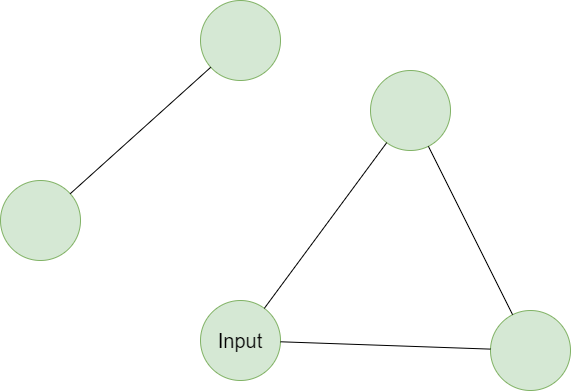

We count each node in our DFS traversal. In this example, our count will be 3. However, the total amount of nodes in the graph is 5; therefore, our graph is not connected.

Let's look at another example:

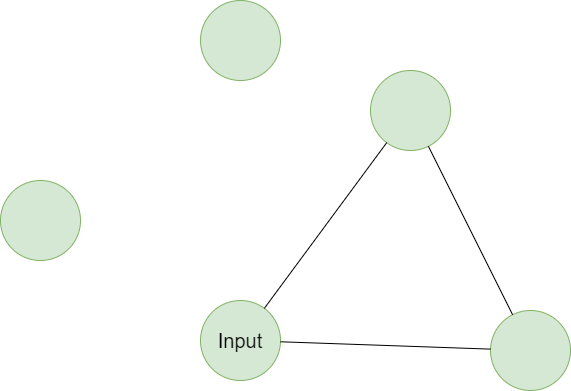

In this example, our count will be 3. In this algorithm, we do not consider isolated vertices as part of the graph. So, we subtract the amount of isolated vertices (2) from the total amount of nodes (5); therefore, our graph is connected.


3.   **Geometric graphs respect the triangle inequality**




Reminder: the triangle inequality applies to any 3 vertices: $C(e_{ab}) + C(e_{bc}) \geq C(e_{ac})$, where $e_{ij}$ denotes the edge between vertex $i$ and $j$, and $C(e)$ denotes the cost of an edge. In other words, the DIRECT edge between two nodes is always the lowest cost path between the two nodes. Let the distance between two nodes be the cost of the edge connecting them:

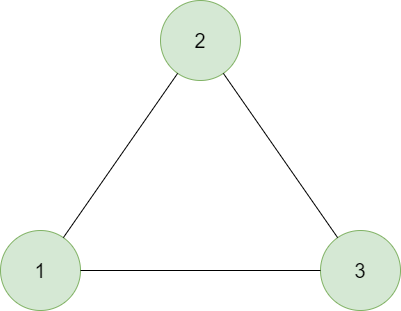

It is obvious to see that the cost of $e_{13}$ is lower than that of $e_{12}$ and $e_{23}$ combined. Therefore, by using geometric graphs and converting them to weighted graphs, we ensure that the triangle inequality is respected.


4.   **Explanation for coding in Phase 2**



For **Phase 2**, we create a Random Graph by defining the `random_graph(num_nodes)` function. Essentially, `random_graph(num_nodes)` creates a 2D list for the adjacency matrix, that will be inputed as the vertices attribute of our class Graph. Its only parameter is the number of nodes (`num_nodes`) we are dealing with.

**Setting up initial variables**: Creates a list called `vertices`. This represents our adjacency matrix. It is initially empty, since we will be inputing each row of the adjacency matrix using `row_am`. `vertices` also represents our 2D list, initially empty. `row_am` represents the weight of each edge, and the weight of each edge will be stored as a list. The list is initially empty however. We then define a random graph with a certain amount of vertices using the networkx function `random_geometrix_graph()`, in which we input the number of nodes `num_nodes` and `radius`. The value of the radius we chose is $2^30$, and it represents the maximum distance between two nodes that are connected with an edge. This random graph stores a bunch of nodes that have a position attribute. We use this property to our advantage by using `nx.get_node_attributes(graph,'pos')` to create a dictionary `position`, and each key of that dictionary has a list of 2 elements. Those two elements in that list represent the $X$ and $Y$ position of the vertices. In other words, position stores all the $X$ and $Y$ coordinates of the vertices, which can be used to calculate the distance between each vertex, a.k.a. the weight of each edge.

**Loop to calculate the weight of each edge**: We use a for loop to iterate all the nodes (from 0 to `num_nodes - 1` (`num_nodes` not included)) and we save this value as `v1`. We do this so that, later, we can identify the $X$ and $Y$ positions, using `position`. Indeed, `v1` will be used to identify the key in the dictionary, and a number will be used to choose whether we want to look at the $X$ component or the $Y$ component of the coordinate, as shown: `position[v1][0]` represents the $X$ coordinate of the `v1` vertex and `position[v1][1]` represents the $Y$ coordinate of `v1`. Inside this for loop, we then define `row_am` as being an empty list that we will insert into `vertices` AND we add another for loop that does the same thing as the first loop, but saves the values under `v2`. `v2` does the same thing as `v1`, but is used to identify the other vertex we want to look at. Inside the second loop, we use these $X$ and $Y$ positions to find the distance between `v1` and `v2` which we define as `weight`. If `v1` is the first node, the for loop will calculate the distance between `v1` and all other vertices, and append each one of those distances into `row_am`. Once each node `v2` has been iterated, this `row_am` is appended into `vertices`. Then the next `v1` node is chosen, and the same process happens again. For loop ends when each `v1` node has been iterated.

The function `random_graph(num_nodes)` will then return the `vertices` 2D list.




5. **Proof that any tree has $n-1$ edges**

This is obvious; think of some node as the "root". All other nodes in the tree are connected to a single parent (the connected node above them) otherwise there would be a cycle. This way, we can group each node with one edge above it, except the root since it has no parent. Therefore, we have $n-1$ edges. Here is an illustration of this:

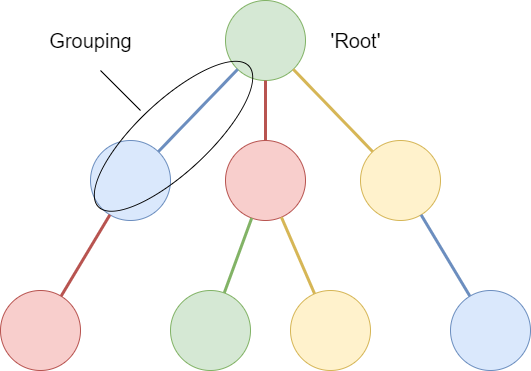

6. **Proof of correctness for Kruskal's algorithm**

To prove correctness, we want to prove that the output graph is connected and that all vertices are in it. Of course, we assume our input graph is connected.

**The output graph is connected:**

We will prove this by contradiction. First, it is obvious to see that in Kruskal's algorithm, every single edge is at one point a candidate to be added to $G'$, since our algorithm terminates when no edges are left in $G$. Now assume, the final output graph is disconnected; it is partitioned into $G'_{1}$ and $G'_{2}$, both of which share no edges or vertices. However, there must exist some edge that potentially connects $G'_{1}$ and $G'_{2}$, since $G$ was connected. Since $G'_{1}$ and $G'_{2}$ contain no cycles, there must have been a candidate edge in $G$ that allowed a connection between both sub graphs of $G'$, since connecting two trees by a single edge doesn't create a cycle. However, in our final output, that edge has not been added. Therefore, we have found a contradiction. 

**The output graph contains all vertices:**

We will prove by contradiction. Assume in our output graph there is an isolated vertex $u_i$. Creating an edge between the connected graph $G'_c$ and our isolated vertex will not create a cycle. Since our original graph $G$ was connected, then there must have been a valid candidate edge to connect $u_i$ to $G'_c$. Therefore, we have found a contradiction. 

7.   **Proof that every graph has an even amount of odd degree vertices**

Proof by contradiction: 

Assume $G'$ is a graph such that there is an odd amount of odd degree vertices. Let $u'_{i}$ denote a vertex in $G'$. Let $d(u_{i})$ be a function that inputs a vertex and returns its degree. $\sum d(u_{i}) = 2|E(G)|$ for some graph $G$. This makes sense, because an edge connects two vertices together; therefore, if we sum all the degrees of all the vertices, all edges will be counted twice. This equation implies that the sum of all the degrees in a graph is always even. However, by definition, we know that $\sum d(u'_{i})$ is odd, since an odd amount of odd degree vertices yields an odd sum of degrees, and even degrees do not change the parity. Therefore, we have a contradiction. 



8. **Proof that even graphs always have an Eulerian circuit**

The proof can be found in the following reference$^{[3]}$ for theorem 3.1

9.   **Explanation for coding in Phase 4**

For **Phase 4**, we started the brute force algorithm by converting the adjacency matrix from a 2D list into a dictionary, since the brute force algorithm [1] uses as input a dictionary for the adjacency matrix. Once this is complete, we must define the brute force algorithm `def find_paths(node, cities, path, distance)`, which was done by using the code from [1]. We decided to import this part of the code (`find_paths()`) since it was trivial. It should be noted that the `brute_force(vertices)` function was simply created to return the solution path and distance of the brute force algorithm, since `find_paths()` does not return it (it simply runs the brute force algorithm and populate a list called `routes`). We had to create the `brute_force(vertices)` function to be used in the first cost solution graph since we will want the actual values of the cost/distance. It should also be noted that `find_paths()` has an extra parameter NOT initially in [1]. We call that parameter `routes`, and it is a 2D list that stores one distance and one path. This is what is returned in the `brute_force(vertices)` function.

10. **Explanation of the recursive process (for nearest neighbour)**

Recursion can be a hard concept to wrap your mind around, so I will explain why recursion works. Many people struggle with the idea of the recusive function coming to a stop. This will be explained. 

A recursive function is a function that invokes itself. Without a stopping condition, a function will keep invoking itself forever. 

Example: 

```
def print_myself():
    print('Hello')
    print_myself()
    return
```

Let's draw a diagram to see what is happening behind the scenes:

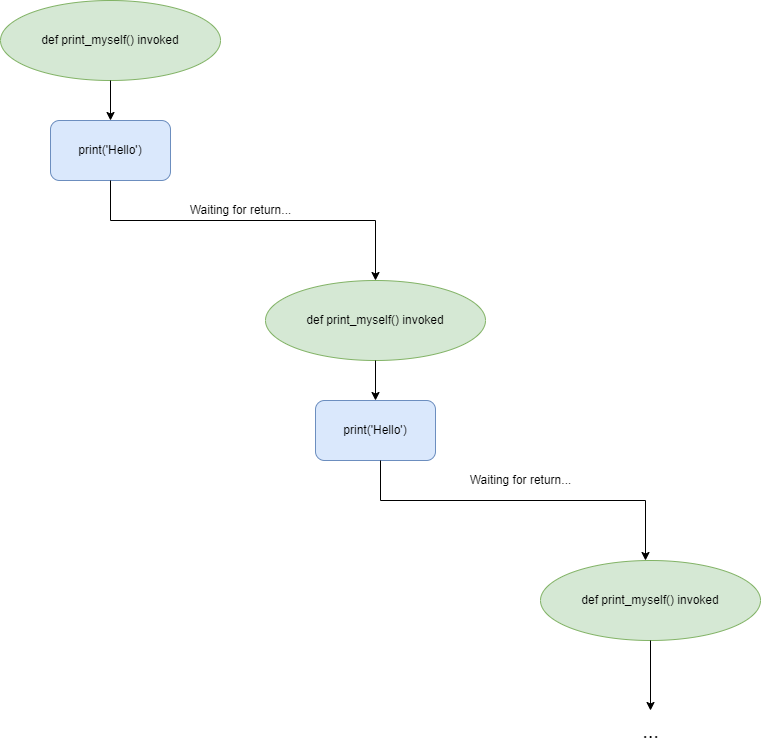

Each instance of the function being called is waiting for the invoked function to return a value, but the `return` statement is never executed, since the function is called before that. Therefore, we need a stopping condition; a condition that will prevent the function from invoking itself any further. For nearest neighbour's algorithm, the stopping condition for the recusion is the length of the `possible_nodes` list. Since we always remove a node from the possible_nodes list at each iteration of the algorithm, we know that the condition `len(possible_nodes) == 0` will eventually be satisfied. So, each instance of invoked functions waiting for `return` will receive a value; therefore, the code will NOT run forever.  





---



# References: 

[1] Westphahl, S. (n.d.). TSP brute-force solution. Gist. Retrieved May 16, 2022, from https://gist.github.com/westphahl/432876 

[2] Burille, Sophia. Traveling Salesman Problem. 16 May 2016, http://math.stmarys-ca.edu/wp-content/uploads/2017/07/Sophia-Burille.pdf. 

[3] Eulerian and Hamiltonian Graphs - ELTE. http://compalg.inf.elte.hu/~tony/Oktatas/TDK/FINAL/Chap%203.PDF. 

[4] “Scipy.optimize.curve_fit#.” Scipy.optimize.curve_fit - SciPy v1.8.1 Manual, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html. 